In [1]:
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# MODIS Terra NDVI 16-Day Data
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD13Q1
# 16 day data at 250m spatial resolution.

# MODIS Terra NDVI Daily Data (has No Scale Factor)
# https://developers.google.cn/earth-engine/datasets/catalog/MODIS_MOD09GA_006_NDVI#description 
# Daily data at 500m spatial resolution used for this analysis and also available at 1 km.
# This dataset is a part of:
# https://www.usgs.gov/centers/eros/science/usgs-eros-archive-vegetation-monitoring-eros-moderate-resolution-imaging

# A gap of missing values from 2/19/2016 to 2/27/2016 is linearly interpolated based on assuming a linear trend between the two nearest known data values.
# This linear interpolation is reapplied to the other datasets, except for 2013, to fill in the Midwest averaged NDVI daily data missing for only one or two dates per dataset.
# Those dates missing data dealt with through linear interpolation were; 8/26/2009, 9/7/2009, 8/11/2010, 1/19/2011, 5/11/2012, 3/14/2014, 12/12/2014, 10/28/2015, 2/18/2016-2/27/2016, 4/24/2017, 12/5/2018.
# The missing NDVI value on 2/18/2016 was able to be filled with a 16-Day MODIS Terra NDVI value averaged over the Midwest for the same date.  

          Date  NDVI Value
0     1-Jan-09       0.094
1     2-Jan-09       0.089
2     3-Jan-09       0.059
3     4-Jan-09       0.053
4     5-Jan-09       0.088
..         ...         ...
359  26-Dec-09       0.057
360  27-Dec-09       0.044
361  28-Dec-09       0.045
362  29-Dec-09       0.051
363  30-Dec-09       0.016

[364 rows x 2 columns]


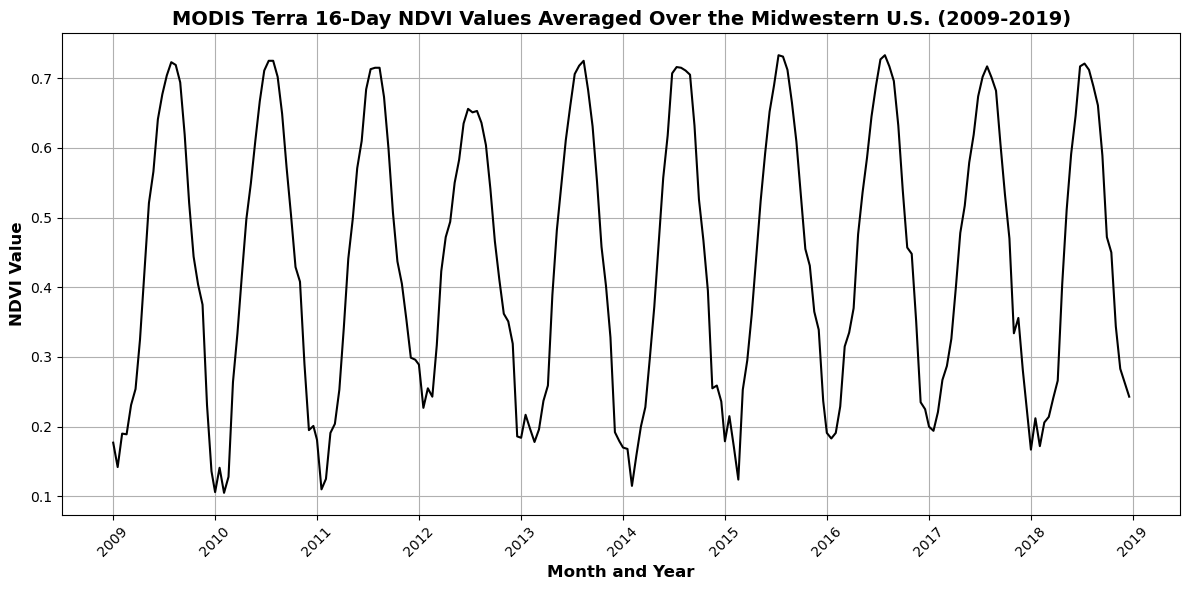

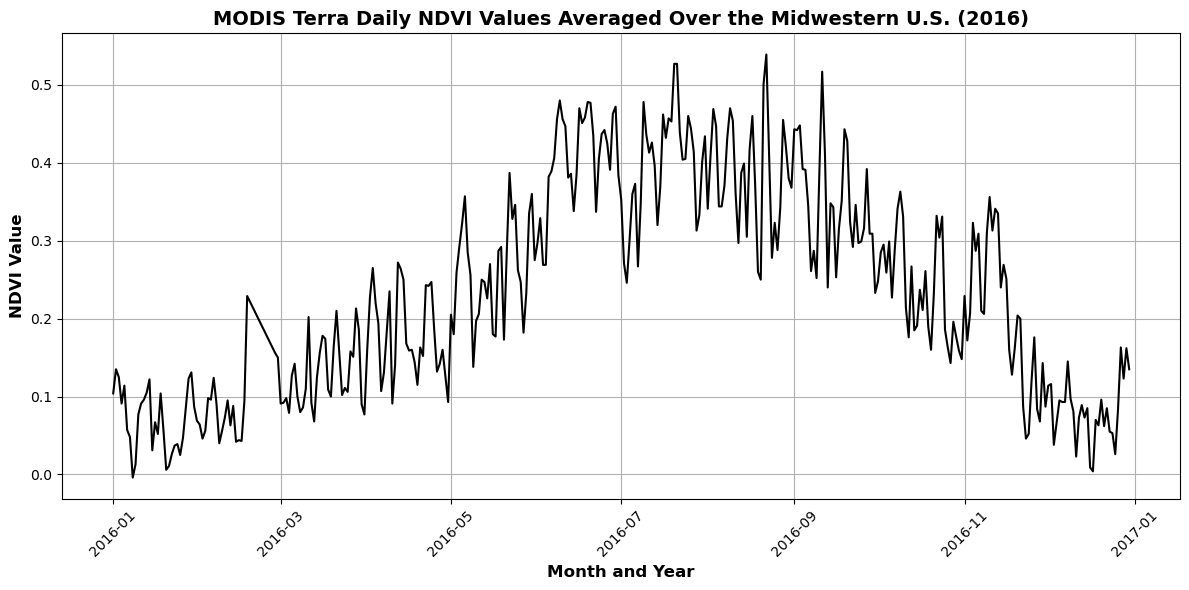

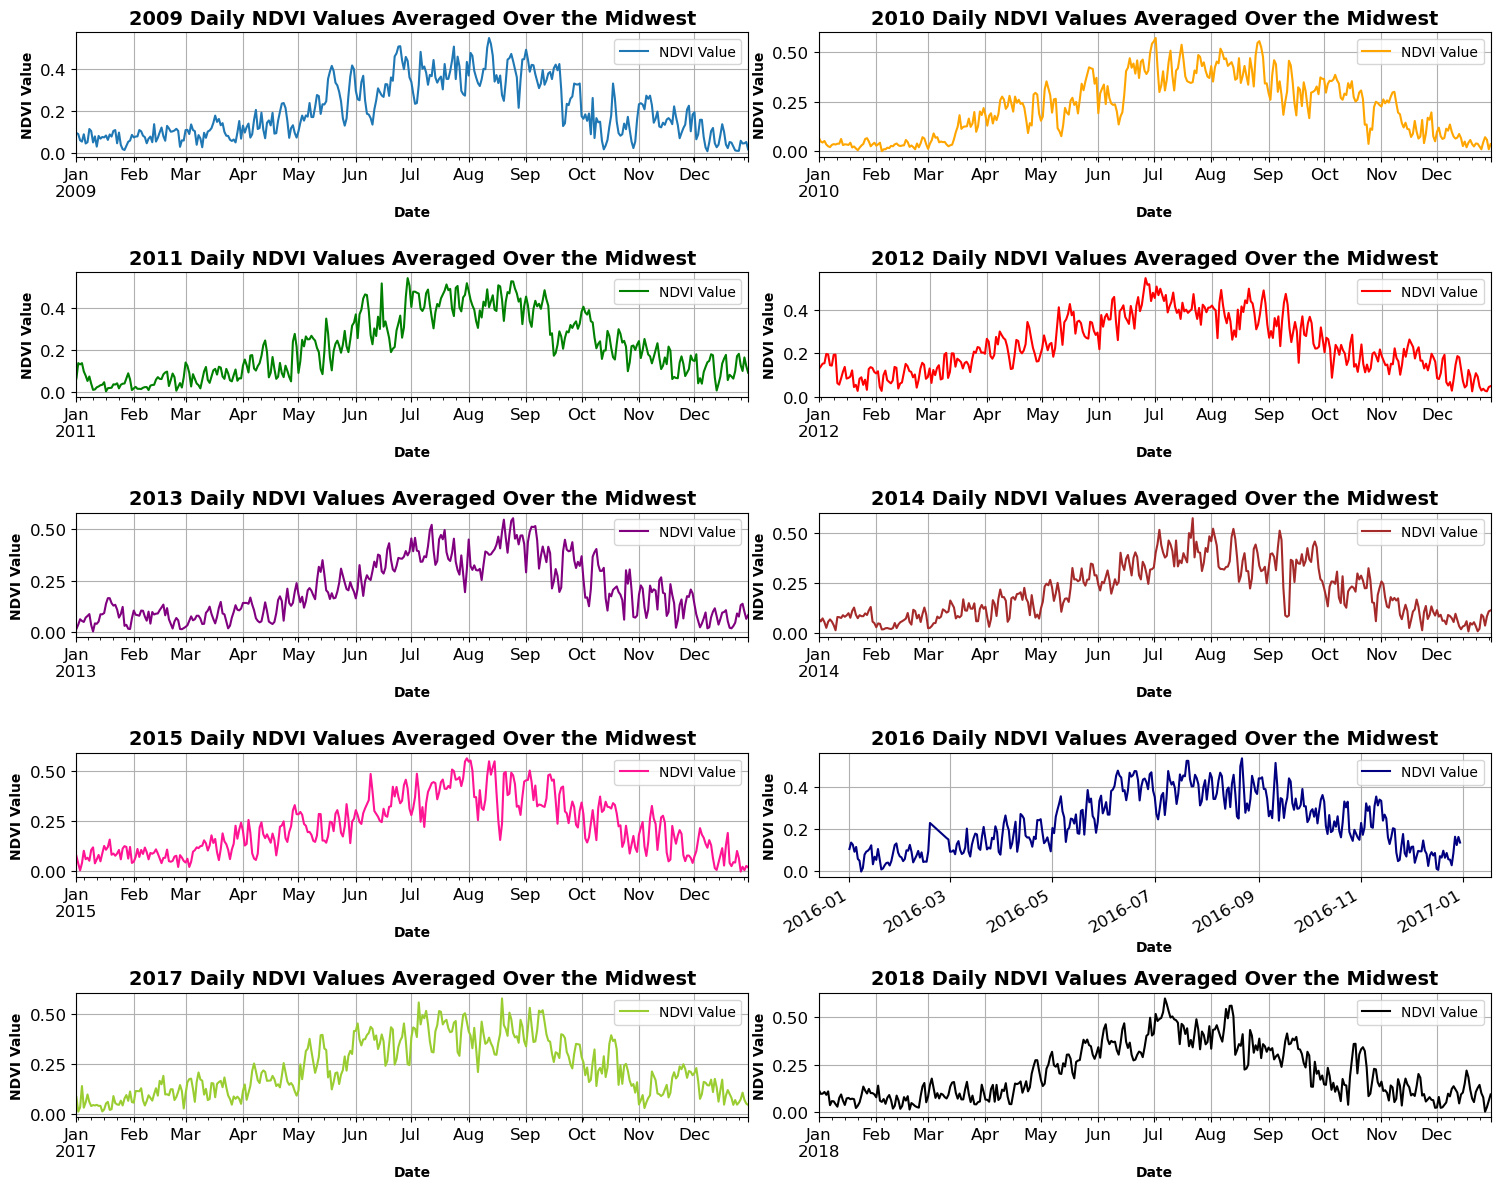

In [2]:
# load daily NDVI values averaged over Midwest U.S. per year data
def load_and_prepare_data(years):
    data_frames = {}
    for year in years:
        file_path = f"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/MODIS_NDVI_Data/{year}_Daily_NDVI.csv"
        df = pd.read_csv(file_path)
        data_frames[year] = df  
    # Remove unnamed 3rd column at index 2 if present 
        if df.shape[1] > 2 and df.columns[2].startswith('Unnamed'):
            df.drop(df.columns[2], axis=1, inplace=True)
    return data_frames

# Main execution of function to get data
years = range(2009, 2019)
daily_NDVI_data = load_and_prepare_data(years)

# Print 2009_Daily_NDVI dataframe loaded above
print(daily_NDVI_data[2009]) 

# Also load 16-day daily NDVI MODIS Terra values averaged over the Midwest
file_path = f"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/MODIS_NDVI_Data/2009_2019_NDVI_16Day_Timeseries.csv"
NDVI_16day = pd.read_csv(file_path)

# Convert 'acq_date' to datetime
date_format='mixed'
ndvi_2009 = daily_NDVI_data[2009]
ndvi_2009['Date'] = pd.to_datetime(ndvi_2009['Date'], format=date_format)
ndvi_2010 = daily_NDVI_data[2010]
ndvi_2010['Date'] = pd.to_datetime(ndvi_2010['Date'], format=date_format)
ndvi_2011 = daily_NDVI_data[2011]
ndvi_2011['Date'] = pd.to_datetime(ndvi_2011['Date'], format=date_format)
ndvi_2012 = daily_NDVI_data[2012]
ndvi_2012['Date'] = pd.to_datetime(ndvi_2012['Date'], format=date_format)
ndvi_2013 = daily_NDVI_data[2013]
ndvi_2013['Date'] = pd.to_datetime(ndvi_2013['Date'], format=date_format)
ndvi_2014 = daily_NDVI_data[2014]
ndvi_2014['Date'] = pd.to_datetime(ndvi_2014['Date'], format=date_format)
ndvi_2015 = daily_NDVI_data[2015]
ndvi_2015['Date'] = pd.to_datetime(ndvi_2015['Date'], format=date_format)
ndvi_2016 = daily_NDVI_data[2016]
ndvi_2016['Date'] = pd.to_datetime(ndvi_2016['Date'], format=date_format)
ndvi_2017 = daily_NDVI_data[2017]
ndvi_2017['Date'] = pd.to_datetime(ndvi_2017['Date'], format=date_format)
ndvi_2018 = daily_NDVI_data[2018]
ndvi_2018['Date'] = pd.to_datetime(ndvi_2018['Date'], format=date_format)

NDVI_16day['Date'] = pd.to_datetime(NDVI_16day['Date'], format=date_format)

# Create plot of Date and NDVI Value column for 2009-2019 dataframes
plt.figure(figsize=(12, 6))
plt.plot(NDVI_16day['Date'], NDVI_16day['NDVI Value'], color='black')  # Ensure the column name is correct
plt.title('MODIS Terra 16-Day NDVI Values Averaged Over the Midwestern U.S. (2009-2019)', fontweight='bold', fontsize=14)
plt.xlabel('Month and Year', fontweight='bold', fontsize=12)
plt.ylabel('NDVI Value', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# A gap of missing values from 2/19/2016 to 2/27/2016 is linearly interpolated based on assuming a linear trend between the two nearest known data values.
# This linear interpolation is reapplied to the other datasets, except for 2013, to fill in the Midwest averaged NDVI daily data missing for only one or two dates per dataset.
# Those dates missing data dealt with through linear interpolation were; 8/26/2009, 9/7/2009, 8/11/2010, 1/19/2011, 5/11/2012, 3/14/2014, 12/12/2014, 10/28/2015, 2/18/2016-2/27/2016, 4/24/2017, 12/5/2018.
# The missing NDVI value on 2/18/2016 was able to be filled with a 16-Day MODIS Terra NDVI value averaged over the Midwest for the same date.  
ndvi_2009['NDVI Value'] = ndvi_2009['NDVI Value'].interpolate(method='linear')
ndvi_2010['NDVI Value'] = ndvi_2010['NDVI Value'].interpolate(method='linear')
ndvi_2011['NDVI Value'] = ndvi_2011['NDVI Value'].interpolate(method='linear')
ndvi_2012['NDVI Value'] = ndvi_2012['NDVI Value'].interpolate(method='linear')
ndvi_2013['NDVI Value'] = ndvi_2013['NDVI Value'].interpolate(method='linear')
ndvi_2014['NDVI Value'] = ndvi_2014['NDVI Value'].interpolate(method='linear')
ndvi_2015['NDVI Value'] = ndvi_2015['NDVI Value'].interpolate(method='linear')
ndvi_2016['NDVI Value'] = ndvi_2016['NDVI Value'].interpolate(method='linear')
ndvi_2017['NDVI Value'] = ndvi_2017['NDVI Value'].interpolate(method='linear')
ndvi_2018['NDVI Value'] = ndvi_2018['NDVI Value'].interpolate(method='linear')

# Check 2016 plot for missing values present
plt.figure(figsize=(12, 6))
plt.plot(ndvi_2016['Date'], ndvi_2016['NDVI Value'], color='black')  # Ensure the column name is correct
plt.title('MODIS Terra Daily NDVI Values Averaged Over the Midwestern U.S. (2016)', fontweight='bold', fontsize=14)
plt.xlabel('Month and Year', fontweight='bold', fontsize=12)
plt.ylabel('NDVI Value', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plot line graphs as subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))

# First subplot
ndvi_2009.plot(kind='line', x='Date', y='NDVI Value', ax=axs[0, 0])
axs[0, 0].set_title('2009 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Date', fontweight='bold')
axs[0, 0].set_ylabel('NDVI Value', fontweight='bold')
axs[0, 0].tick_params(axis='both', which='major', labelsize=12)
axs[0, 0].grid()

ndvi_2010.plot(kind='line', x='Date', y='NDVI Value', ax=axs[0, 1], color='orange')
axs[0, 1].set_title('2010 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Date', fontweight='bold')
axs[0, 1].set_ylabel('NDVI Value', fontweight='bold')
axs[0, 1].tick_params(axis='both', which='major', labelsize=12)
axs[0, 1].grid()

ndvi_2011.plot(kind='line', x='Date', y='NDVI Value', ax=axs[1, 0], color='green')
axs[1, 0].set_title('2011 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Date', fontweight='bold')
axs[1, 0].set_ylabel('NDVI Value', fontweight='bold')
axs[1, 0].tick_params(axis='both', which='major', labelsize=12)
axs[1, 0].grid()

ndvi_2012.plot(kind='line', x='Date', y='NDVI Value', ax=axs[1, 1], color='red')
axs[1, 1].set_title('2012 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Date', fontweight='bold')
axs[1, 1].set_ylabel('NDVI Value', fontweight='bold')
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)
axs[1, 1].grid()

ndvi_2013.plot(kind='line', x='Date', y='NDVI Value', ax=axs[2, 0], color='purple')
axs[2, 0].set_title('2013 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[2, 0].set_xlabel('Date', fontweight='bold')
axs[2, 0].set_ylabel('NDVI Value', fontweight='bold')
axs[2, 0].tick_params(axis='both', which='major', labelsize=12)
axs[2, 0].grid()

ndvi_2014.plot(kind='line', x='Date', y='NDVI Value', ax=axs[2, 1], color='brown')
axs[2, 1].set_title('2014 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[2, 1].set_xlabel('Date', fontweight='bold')
axs[2, 1].set_ylabel('NDVI Value', fontweight='bold')
axs[2, 1].tick_params(axis='both', which='major', labelsize=12)
axs[2, 1].grid()

ndvi_2015.plot(kind='line', x='Date', y='NDVI Value', ax=axs[3, 0], color='deeppink')
axs[3, 0].set_title('2015 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[3, 0].set_xlabel('Date', fontweight='bold')
axs[3, 0].set_ylabel('NDVI Value', fontweight='bold')
axs[3, 0].tick_params(axis='both', which='major', labelsize=12)
axs[3, 0].grid()

ndvi_2016.plot(kind='line', x='Date', y='NDVI Value', ax=axs[3, 1], color='navy')
axs[3, 1].set_title('2016 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[3, 1].set_xlabel('Date', fontweight='bold')
axs[3, 1].set_ylabel('NDVI Value', fontweight='bold')
axs[3, 1].tick_params(axis='both', which='major', labelsize=12)
axs[3, 1].grid()

ndvi_2017.plot(kind='line', x='Date', y='NDVI Value', ax=axs[4, 0], color='yellowgreen')
axs[4, 0].set_title('2017 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[4, 0].set_xlabel('Date', fontweight='bold')
axs[4, 0].set_ylabel('NDVI Value', fontweight='bold')
axs[4, 0].tick_params(axis='both', which='major', labelsize=12)
axs[4, 0].grid()

ndvi_2018.plot(kind='line', x='Date', y='NDVI Value', ax=axs[4, 1], color='black')
axs[4, 1].set_title('2018 Daily NDVI Values Averaged Over the Midwest', fontsize=14, fontweight='bold')
axs[4, 1].set_xlabel('Date', fontweight='bold')
axs[4, 1].set_ylabel('NDVI Value', fontweight='bold')
axs[4, 1].tick_params(axis='both', which='major', labelsize=12)
axs[4, 1].grid()

plt.tight_layout()
plt.show()

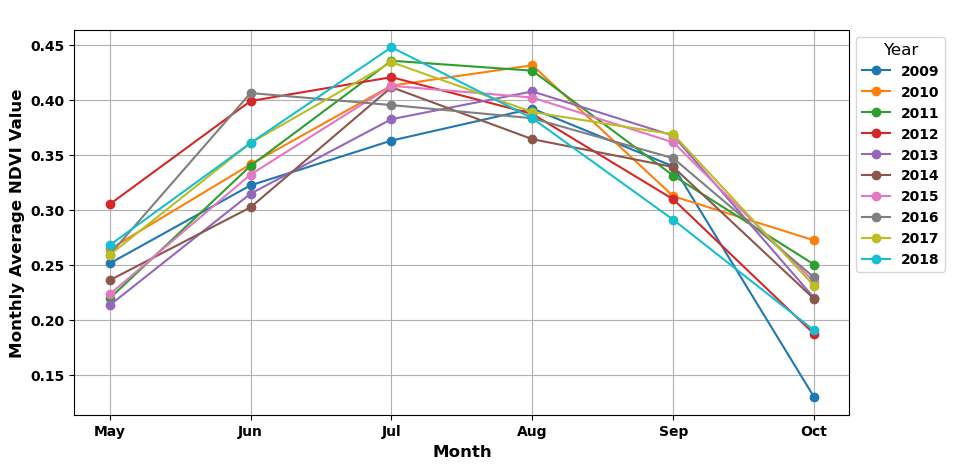

In [4]:
# daily NDVI to Monthly average NDVI value as new column in each dataframe
ndvi_2009['Month'] = ndvi_2009['Date'].dt.month
monthly_ndvi_2009 = ndvi_2009.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2009.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2010['Month'] = ndvi_2010['Date'].dt.month
monthly_ndvi_2010 = ndvi_2010.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2010.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2011['Month'] = ndvi_2011['Date'].dt.month
monthly_ndvi_2011 = ndvi_2011.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2011.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2012['Month'] = ndvi_2012['Date'].dt.month
monthly_ndvi_2012 = ndvi_2012.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2012.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2013['Month'] = ndvi_2013['Date'].dt.month
monthly_ndvi_2013 = ndvi_2013.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2013.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2014['Month'] = ndvi_2014['Date'].dt.month
monthly_ndvi_2014 = ndvi_2014.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2014.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2015['Month'] = ndvi_2015['Date'].dt.month
monthly_ndvi_2015 = ndvi_2015.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2015.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2016['Month'] = ndvi_2016['Date'].dt.month
monthly_ndvi_2016 = ndvi_2016.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2016.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2017['Month'] = ndvi_2017['Date'].dt.month
monthly_ndvi_2017 = ndvi_2017.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2017.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)
ndvi_2018['Month'] = ndvi_2018['Date'].dt.month
monthly_ndvi_2018 = ndvi_2018.groupby(['Month']).agg({'NDVI Value': 'mean'}).reset_index()
monthly_ndvi_2018.rename(columns={'NDVI Value': 'Monthly Average NDVI Value'}, inplace=True)

# Merge monthly averages back to the original dataframe if needed
ndvi_2009 = ndvi_2009.merge(monthly_ndvi_2009, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2010 = ndvi_2010.merge(monthly_ndvi_2010, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2011 = ndvi_2011.merge(monthly_ndvi_2011, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2012 = ndvi_2012.merge(monthly_ndvi_2012, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2013 = ndvi_2013.merge(monthly_ndvi_2013, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2014 = ndvi_2014.merge(monthly_ndvi_2014, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2015 = ndvi_2015.merge(monthly_ndvi_2015, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2016 = ndvi_2016.merge(monthly_ndvi_2016, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2017 = ndvi_2017.merge(monthly_ndvi_2017, on='Month', how='left', suffixes=('', '_avg'))
ndvi_2018 = ndvi_2018.merge(monthly_ndvi_2018, on='Month', how='left', suffixes=('', '_avg'))

# Filter the data to include only May to October
months_to_include = [5, 6, 7, 8, 9, 10]
# Create a function to filter the DataFrame
def filter_months(df):
    return df[df['Month'].isin(months_to_include)]
# Apply the filter to each DataFrame
monthly_ndvi_2009 = filter_months(monthly_ndvi_2009)
monthly_ndvi_2010 = filter_months(monthly_ndvi_2010)
monthly_ndvi_2011 = filter_months(monthly_ndvi_2011)
monthly_ndvi_2012 = filter_months(monthly_ndvi_2012)
monthly_ndvi_2013 = filter_months(monthly_ndvi_2013)
monthly_ndvi_2014 = filter_months(monthly_ndvi_2014)
monthly_ndvi_2015 = filter_months(monthly_ndvi_2015)
monthly_ndvi_2016 = filter_months(monthly_ndvi_2016)
monthly_ndvi_2017 = filter_months(monthly_ndvi_2017)
monthly_ndvi_2018 = filter_months(monthly_ndvi_2018)

# Line plot of Monthly Average NDVI Value per Month for 2018, with 2018 in legend
plt.figure(figsize=(10, 5))
plt.plot(monthly_ndvi_2009['Month'], monthly_ndvi_2009['Monthly Average NDVI Value'], marker='o', label='2009')
plt.plot(monthly_ndvi_2010['Month'], monthly_ndvi_2010['Monthly Average NDVI Value'], marker='o', label='2010')
plt.plot(monthly_ndvi_2011['Month'], monthly_ndvi_2011['Monthly Average NDVI Value'], marker='o', label='2011')
plt.plot(monthly_ndvi_2012['Month'], monthly_ndvi_2012['Monthly Average NDVI Value'], marker='o', label='2012')
plt.plot(monthly_ndvi_2013['Month'], monthly_ndvi_2013['Monthly Average NDVI Value'], marker='o', label='2013')
plt.plot(monthly_ndvi_2014['Month'], monthly_ndvi_2014['Monthly Average NDVI Value'], marker='o', label='2014')
plt.plot(monthly_ndvi_2015['Month'], monthly_ndvi_2015['Monthly Average NDVI Value'], marker='o', label='2015')
plt.plot(monthly_ndvi_2016['Month'], monthly_ndvi_2016['Monthly Average NDVI Value'], marker='o', label='2016')
plt.plot(monthly_ndvi_2017['Month'], monthly_ndvi_2017['Monthly Average NDVI Value'], marker='o', label='2017')
plt.plot(monthly_ndvi_2018['Month'], monthly_ndvi_2018['Monthly Average NDVI Value'], marker='o', label='2018')

plt.title(' ', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Average NDVI Value', fontsize=12, fontweight='bold')
plt.xticks([5, 6, 7, 8, 9, 10], ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

# Remove all plot data from January to April or November to December

plt.legend(title="Year", title_fontsize='12', bbox_to_anchor=(1, 1), prop={'weight': 'bold'})
plt.grid()
# Get the current axes
ax = plt.gca()  
# bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('10')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('10')
    
plt.show()

In [10]:
# 2009 MODIS fire detections with corresponding landcover value at each detected burn point
df_2009 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2009_MODIS_Midwest_Veg_Fire_Detections_Harvest_Season_TableToExcel.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2009 = df_2009[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2010 MODIS fire detections with corresponding landcover value at each detected burn point
df_2010 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2010_MODIS_Midwest_Veg_Fire_Detections_Harvest_Season_TableToExcel.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2010 = df_2010[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2011 MODIS fire detections with corresponding landcover value at each detected burn point
df_2011 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2011_MODIS_Midwest_Veg_Fire_Detections_Harvest_Season_TableToExcel.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2011 = df_2011[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2012 MODIS & VIIRS fire detections with corresponding landcover value at each detected burn point
df_2012 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2012_MODIS_VIIRS_Midwest_Veg_Fire_Detections_Harvest_Season.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2012 = df_2012[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2013 MODIS & VIIRS fire detections with corresponding landcover value at each detected burn point
df_2013 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2013_MODIS_VIIRS_Midwest_Veg_Fire_Detections_Harvest_Season.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2013 = df_2013[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2014 MODIS & VIIRS fire detections with corresponding landcover value at each detected burn point
df_2014 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2014_MODIS_VIIRS_Midwest_Veg_Fire_Detections_Harvest_Season.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2014 = df_2014[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2015 MODIS & VIIRS fire detections with corresponding landcover value at each detected burn point
df_2015 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2015_MODIS_VIIRS_Midwest_Veg_Fire_Detections_Harvest_Season.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2015 = df_2015[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2016 MODIS & VIIRS fire detections with corresponding landcover value at each detected burn point
df_2016 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2016_MODIS_VIIRS_Midwest_Veg_Fire_Detections_Harvest_Season.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2016 = df_2016[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2017 MODIS & VIIRS fire detections with corresponding landcover value at each detected burn point
df_2017 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2017_MODIS_VIIRS_Midwest_Veg_Fire_Detections_Harvest_Season.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2017 = df_2017[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

# 2018 MODIS & VIIRS fire detections with corresponding landcover value at each detected burn point
df_2018 = pd.read_excel(r"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/Fire_Detections_w_Landcover/withLandCoverValues_2018_MODIS_VIIRS_Midwest_Veg_Fire_Detections_Harvest_Season.xlsx")
# Only keep necessary columns OBJECTID, latitude, longitude, acq_date, month, year, LandCoverValue, LandCoverType, LandCoverValueID, LandCoverTypeID
df_2018 = df_2018[['OBJECTID', 'latitude', 'longitude', 'acq_date', 'month', 'year', 'LandCoverValue', 'LandCoverType', 'LandCoverValueID', 'LandCoverTypeID']]

#df_2018

# Combine all data frames into one for plotting
all_data = pd.concat([df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018])
# Convert 'acq_date' to datetime
all_data['acq_date'] = pd.to_datetime(all_data['acq_date'])
# Group by year and count detections
time_series_data = all_data.groupby(all_data['acq_date'].dt.year).size()

def calculate_daily_detections(df):
    # Ensure 'acq_date' is in datetime format
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    # Create temporary DataFrame with 'acq_date' as the index
    fires_df = df.set_index('acq_date')
    fires_df['detections'] = 1
    # Resample to get daily detections
    daily_detections = fires_df.resample('D').sum()['detections']
    return daily_detections

# Calculate
daily_detections_2009 = calculate_daily_detections(df_2009)
daily_detections_2010 = calculate_daily_detections(df_2010)
daily_detections_2011 = calculate_daily_detections(df_2011)
daily_detections_2012 = calculate_daily_detections(df_2012)
daily_detections_2013 = calculate_daily_detections(df_2013)
daily_detections_2014 = calculate_daily_detections(df_2014)
daily_detections_2015 = calculate_daily_detections(df_2015)
daily_detections_2016 = calculate_daily_detections(df_2016)
daily_detections_2017 = calculate_daily_detections(df_2017)
daily_detections_2018 = calculate_daily_detections(df_2018)

# Find day and month of each year that recorded the highest amount of fire detections
# Def to find highest detection date per year
def find_highest_detection_date(daily_detections):
    highest_detection_day = daily_detections.idxmax()
    highest_detection_value = daily_detections.max()
    return highest_detection_day, highest_detection_value

# Def to find the highest detection month per year
def find_highest_detection_month(daily_detections):
    # Resample to monthly data with 'M', then aggregate daily vals to monthly total with .sum()
    monthly_detections = daily_detections.resample('M').sum() 
    highest_month = monthly_detections.idxmax()
    highest_value = monthly_detections.max()
    return highest_month, highest_value

# Initialize lists to store results
results_daily = []
results_monthly = []

# Find the highest detections date and month for each year
for year in range(2009, 2019):
    daily_detections = globals()[f'daily_detections_{year}']
    highest_day, highest_value_day = find_highest_detection_date(daily_detections) # apply def to detections
    results_daily.append({'Year': year, 'Highest Number of Detections Date': highest_day.date(), 'Number of MODIS/VIIRS SNPP Fire Detections': highest_value_day})

# Find the highest detection month per year 
for year in range(2009, 2019):
    daily_detections = globals()[f'daily_detections_{year}']
    highest_month, highest_value_month = find_highest_detection_month(daily_detections) # apply def to detections
    results_monthly.append({'Year': year, 'Highest Number of Detections Month': highest_month.strftime("%B %Y"), 'Number of MODIS/VIIRS SNPP Fire Detections': highest_value_month}) 
    
# Save results to DataFrame
highest_daily_detection_dates = pd.DataFrame(results_daily)
highest_detection_months = pd.DataFrame(results_monthly)

# Add column of Daily NDVI Averaged Over Midwest
highest_daily_detection_dates['NDVI Daily Value Averaged Over Midwest'] = [0.351, 0.265, 0.248, 0.43, 0.214, 0.24, 0.228, 0.292, 0.394, 0.317]
print(highest_daily_detection_dates)

   Year Highest Number of Detections Date  \
0  2009                        2009-05-21   
1  2010                        2010-10-22   
2  2011                        2011-05-03   
3  2012                        2012-08-30   
4  2013                        2013-05-07   
5  2014                        2014-05-05   
6  2015                        2015-10-22   
7  2016                        2016-05-04   
8  2017                        2017-10-17   
9  2018                        2018-05-07   

   Number of MODIS/VIIRS SNPP Fire Detections  \
0                                         257   
1                                         191   
2                                         285   
3                                        1856   
4                                         542   
5                                         529   
6                                        1053   
7                                         550   
8                                         525   
9             

In [11]:
# Calculate monthly average NDVI values from above daily values averaged over midwest
# Add column for Average Monthly NDVI Values to correspond to highest_detection_months
# Load daily NDVI values averaged over Midwest U.S. per year data
def load_and_prepare_data(years):
    data_frames = {}
    for year in years:
        file_path = f"C:/Users/308ca/Desktop/Graduate_Fall24_Courses/CLIMATE588_Regional_Climate_Scale/588_final/MODIS_NDVI_Data/{year}_Daily_NDVI.csv"
        df = pd.read_csv(file_path)
        # Remove unnamed 3rd column at index 2 if present 
        if df.shape[1] > 2 and df.columns[2].startswith('Unnamed'):
            df.drop(df.columns[2], axis=1, inplace=True)
        data_frames[year] = df  
    return data_frames

# Main execution of function to get data
years = range(2009, 2019)
daily_NDVI_data = load_and_prepare_data(years)

# Convert 'Date' to datetime for all years
for year in years:
        daily_NDVI_data[year]['Date'] = pd.to_datetime(daily_NDVI_data[year]['Date'], format='%d-%b-%y', dayfirst=True, errors='coerce')

# Interpolate missing NDVI values for each year
for year in years:
    daily_NDVI_data[year]['NDVI Value'] = daily_NDVI_data[year]['NDVI Value'].interpolate(method='linear')

# Calculate monthly average NDVI values
def calculate_monthly_average(ndvi_data):
    ndvi_data.set_index('Date', inplace=True)
    return ndvi_data.resample('M').mean()

monthly_average_2009 = calculate_monthly_average(daily_NDVI_data[2009])
monthly_average_2010 = calculate_monthly_average(daily_NDVI_data[2010])
monthly_average_2011 = calculate_monthly_average(daily_NDVI_data[2011])
monthly_average_2012 = calculate_monthly_average(daily_NDVI_data[2012])
monthly_average_2013 = calculate_monthly_average(daily_NDVI_data[2013])
monthly_average_2014 = calculate_monthly_average(daily_NDVI_data[2014])
monthly_average_2015 = calculate_monthly_average(daily_NDVI_data[2015])
monthly_average_2016 = calculate_monthly_average(daily_NDVI_data[2016])
monthly_average_2017 = calculate_monthly_average(daily_NDVI_data[2017])
monthly_average_2018 = calculate_monthly_average(daily_NDVI_data[2018])

# Print the monthly average NDVI values for years to get specific values for new column
print(monthly_average_2009)
print(highest_detection_months)

            NDVI Value
Date                  
2009-01-31    0.067710
2009-02-28    0.084286
2009-03-31    0.098742
2009-04-30    0.135967
2009-05-31    0.251387
2009-06-30    0.322500
2009-07-31    0.363226
2009-08-31    0.392339
2009-09-30    0.339733
2009-10-31    0.129677
2009-11-30    0.174067
2009-12-31    0.063100
   Year Highest Number of Detections Month  \
0  2009                           May 2009   
1  2010                       October 2010   
2  2011                       October 2011   
3  2012                        August 2012   
4  2013                     September 2013   
5  2014                           May 2014   
6  2015                       October 2015   
7  2016                           May 2016   
8  2017                       October 2017   
9  2018                           May 2018   

   Number of MODIS/VIIRS SNPP Fire Detections  
0                                        2352  
1                                        2073  
2                          

In [25]:
# Add column of Average Monthly NDVI Values (Averaged Over Midwest region still)
highest_detection_months['Monthly Averaged NDVI Value'] = [0.251387, 0.272419, 0.250387, 0.387484, 0.367700, 0.236097, 0.234581, 0.259323, 0.230935, 0.268000]
print(highest_detection_months)
from matplotlib.lines import Line2D

   Year Highest Number of Detections Month  \
0  2009                           May 2009   
1  2010                       October 2010   
2  2011                       October 2011   
3  2012                        August 2012   
4  2013                     September 2013   
5  2014                           May 2014   
6  2015                       October 2015   
7  2016                           May 2016   
8  2017                       October 2017   
9  2018                           May 2018   

   Number of MODIS/VIIRS SNPP Fire Detections  Monthly Averaged NDVI Value  
0                                        2352                     0.251387  
1                                        2073                     0.272419  
2                                        1746                     0.250387  
3                                        7705                     0.387484  
4                                        4801                     0.367700  
5                              

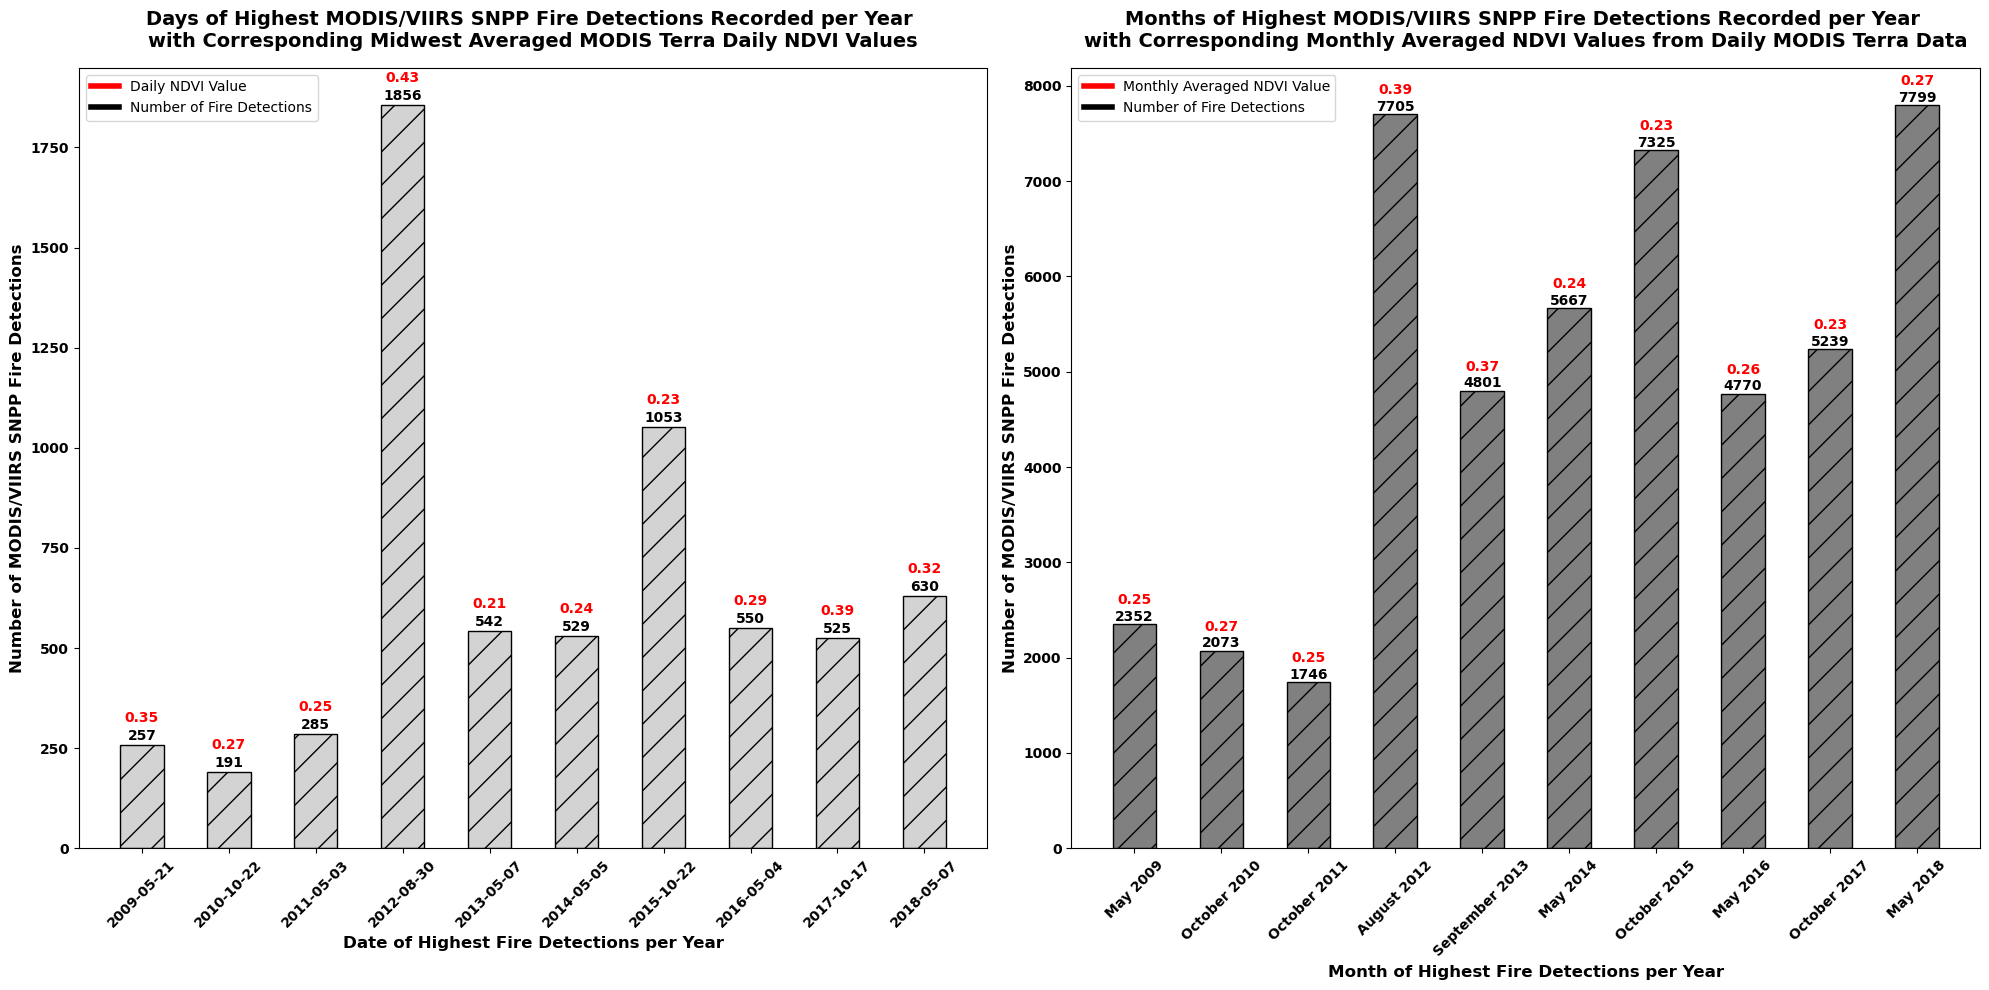

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Bar chart of lowest daily average RH
bars = axs[0].bar(highest_daily_detection_dates['Highest Number of Detections Date'].astype(str), 
                   highest_daily_detection_dates['Number of MODIS/VIIRS SNPP Fire Detections'], 
                   color='lightgray', width=0.5, hatch='/', edgecolor='black')

# Adding average daily RH % above each bar
for bar, rh_value in zip(bars, highest_daily_detection_dates['NDVI Daily Value Averaged Over Midwest']):
    yval = bar.get_height()
    center_x = bar.get_x() + bar.get_width() / 2
    axs[0].text(center_x, yval + 40, 
                 f'{round(yval, 2)}', 
                 ha='center', va='top', color='black', fontweight='bold')
    axs[0].text(center_x, yval + 50, 
                 f'{round(rh_value, 2)}', 
                 ha='center', va='bottom', color='red', fontweight='bold')
legend_elements = [Line2D([0], [0], color='red', lw=4, label='Daily NDVI Value'),
                   Line2D([0], [0], color='black', lw=4, label='Number of Fire Detections')]
axs[0].legend(handles=legend_elements, loc='upper left')

axs[0].set_xlabel('Date of Highest Fire Detections per Year', fontweight='bold', fontsize=12)
axs[0].set_ylabel('Number of MODIS/VIIRS SNPP Fire Detections', fontweight='bold', fontsize=12)
axs[0].set_title('Days of Highest MODIS/VIIRS SNPP Fire Detections Recorded per Year \nwith Corresponding Midwest Averaged MODIS Terra Daily NDVI Values', 
                 fontweight='bold', fontsize=14, pad=15)
axs[0].tick_params(axis='x', rotation=45)

bars_monthly = axs[1].bar(highest_detection_months['Highest Number of Detections Month'], 
                           highest_detection_months['Number of MODIS/VIIRS SNPP Fire Detections'], 
                           color='gray', width=0.5, hatch='/', edgecolor='black')

# Adding average monthly RH % above each bar
for bar, rh_value in zip(bars_monthly, highest_detection_months['Monthly Averaged NDVI Value']):
    yval = bar.get_height()
    center_x = bar.get_x() + bar.get_width() / 2
    axs[1].text(center_x, yval + 150, 
                 f'{round(yval, 2)}', 
                 ha='center', va='top', color='black', fontweight='bold')
    axs[1].text(center_x, yval + 180, 
                 f'{round(rh_value, 2)}', 
                 ha='center', va='bottom', color='red', fontweight='bold')

axs[1].set_xlabel('Month of Highest Fire Detections per Year', fontweight='bold', fontsize=12)
axs[1].set_ylabel('Number of MODIS/VIIRS SNPP Fire Detections', fontweight='bold', fontsize=12)
axs[1].set_title('Months of Highest MODIS/VIIRS SNPP Fire Detections Recorded per Year \nwith Corresponding Monthly Averaged NDVI Values from Daily MODIS Terra Data', 
                 fontweight='bold', fontsize=14, pad=15)  # Changed to integer
axs[1].tick_params(axis='x', rotation=45)
legend_elements = [Line2D([0], [0], color='red', lw=4, label='Monthly Averaged NDVI Value'),
                   Line2D([0], [0], color='black', lw=4, label='Number of Fire Detections')]
axs[1].legend(handles=legend_elements, loc='upper left')


plt.subplots_adjust(wspace=0.5)  # Adjusted width between subplots and axes value fontweight
plt.setp(axs[0].get_xticklabels(), fontweight='bold')
plt.setp(axs[0].get_yticklabels(), fontweight='bold')
plt.setp(axs[1].get_xticklabels(), fontweight='bold')
plt.setp(axs[1].get_yticklabels(), fontweight='bold')

plt.tight_layout()
plt.show()